In [ ]:
# Project Topic: SALES PREDICTION USING PYTHON
""" 
Objective:
Predict sales based on advertising spend on TV, Radio, and Newspaper using various Machine Learning 
models and deploy a Streamlit web app for real-time prediction.
"""


In [4]:
# Installed xgboost
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 985.5 kB/s eta 0:02:32
   ---------------------------------------- 0.8/150.0 MB 907.1 kB/s eta 0:02:45
   ---------------------------------------- 0.8/150.0 MB 907.1 kB/s eta 0:02:45
   ---------------------------------------- 1.3/150.0 MB 1.0 MB/s eta 0:02:27
   ---------------------------------------- 1.6/150.0 MB 1.1 MB/s eta 0:02:17
   ---------------------------------------- 1.8/150.0 MB 1.1 MB/s eta 0:02:10
    --------------------------------------- 2.1/150.0 MB 1.2 MB/s eta 0:02:05
    --------------------------------------- 2.6/150.0 MB 1.3 MB/s eta 0:01:55
    ----

In [5]:
# Step1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

In [6]:
# Step2: Load Dataset:-
df = pd.read_csv(r'C:\Codsoft Project Data Science\Task4\advertising.csv')

In [7]:
# Step3: Basic Data Exploration:-
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [8]:
# Step4: Statistical Summary & Insights
print("Dataset Shape:", df.shape)
print("\nColums:", df.columns)

Dataset Shape: (200, 4)

Colums: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


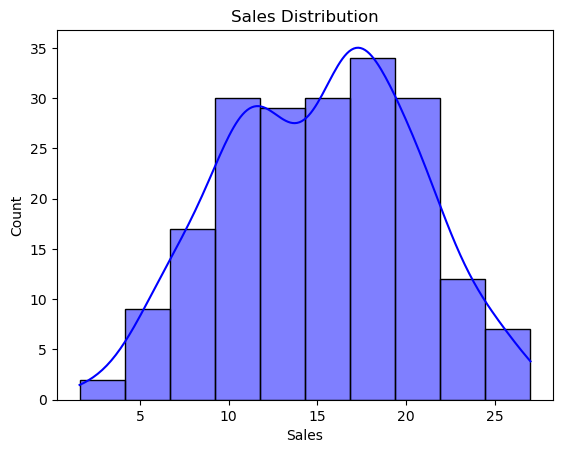

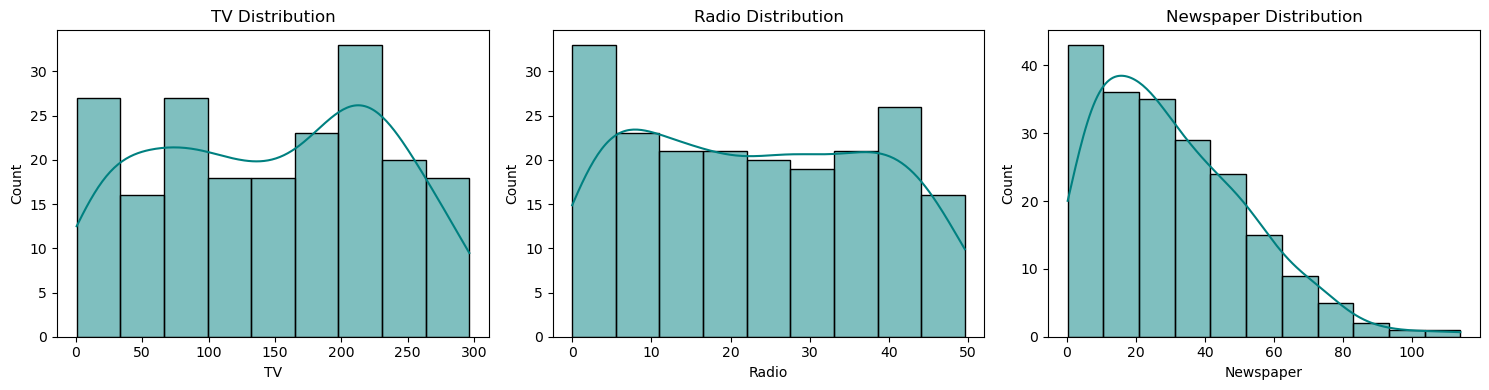

In [9]:
# Step5: Univariate Analysis of Sales
sns.histplot(df['Sales'], kde=True, color='blue')
plt.title('Sales Distribution')
plt.show()

# Extra Univariate Analysis: Individual Feature Distributions
features = ['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(15,4))
for idx, feature in enumerate(features):
    plt.subplot(1, 3, idx+1)
    sns.histplot(df[feature], kde=True, color='teal')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

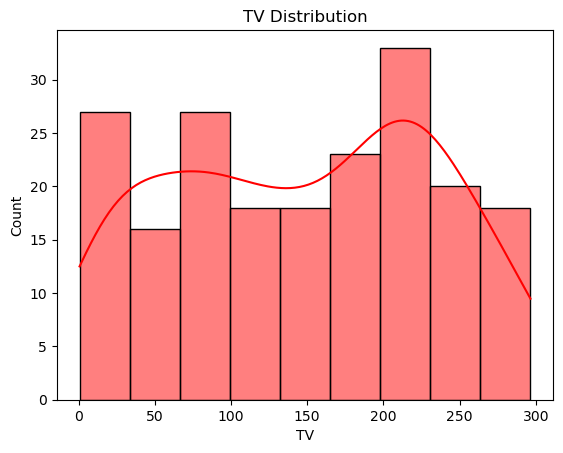

In [10]:
# Step5: Univariate Analysis of TV
sns.histplot(df['TV'], kde=True, color='red')
plt.title('TV Distribution')
plt.show()

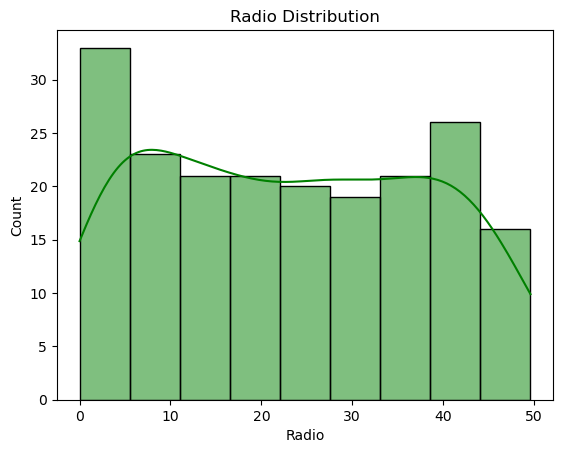

In [11]:
# Step5: Univariate Analysis of Radio
sns.histplot(df['Radio'], kde=True, color='Green')
plt.title('Radio Distribution')
plt.show()

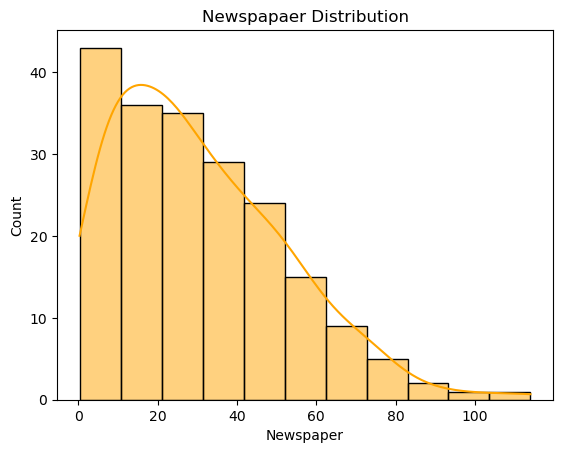

In [16]:
# Step5: Univariate Analysis of Newspaper
sns.histplot(df['Newspaper'], kde=True, color='orange')
plt.title('Newspapaer Distribution')
plt.show()

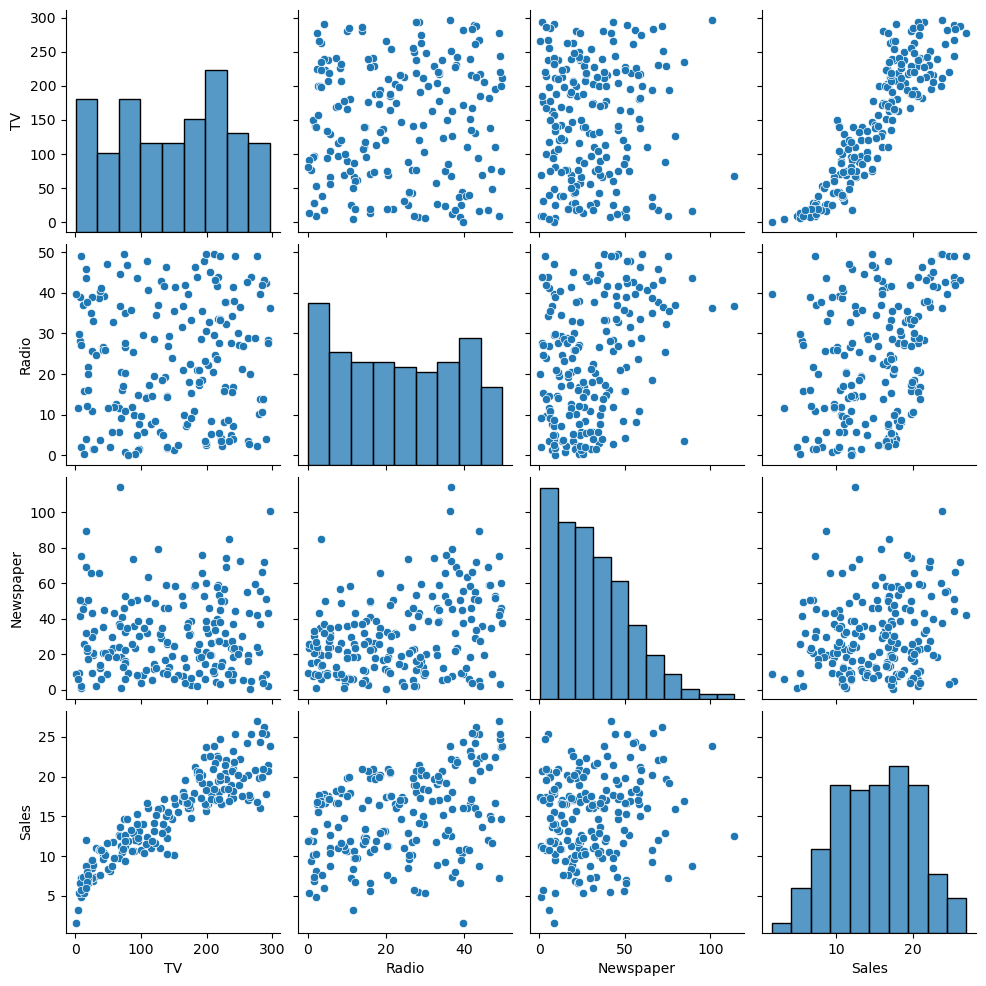

In [18]:
# Step6: Bivariate Analysis
sns.pairplot(df)
plt.show()

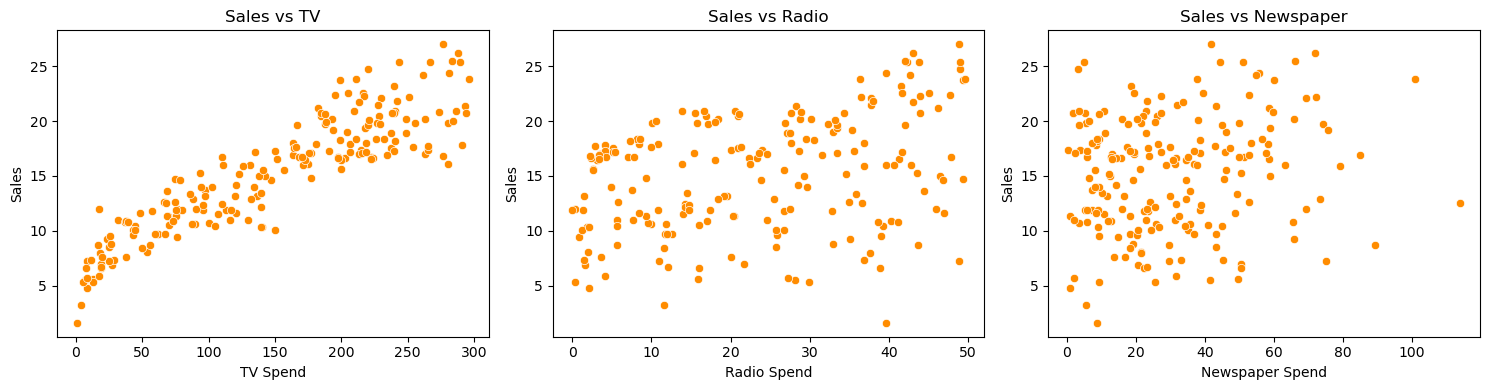

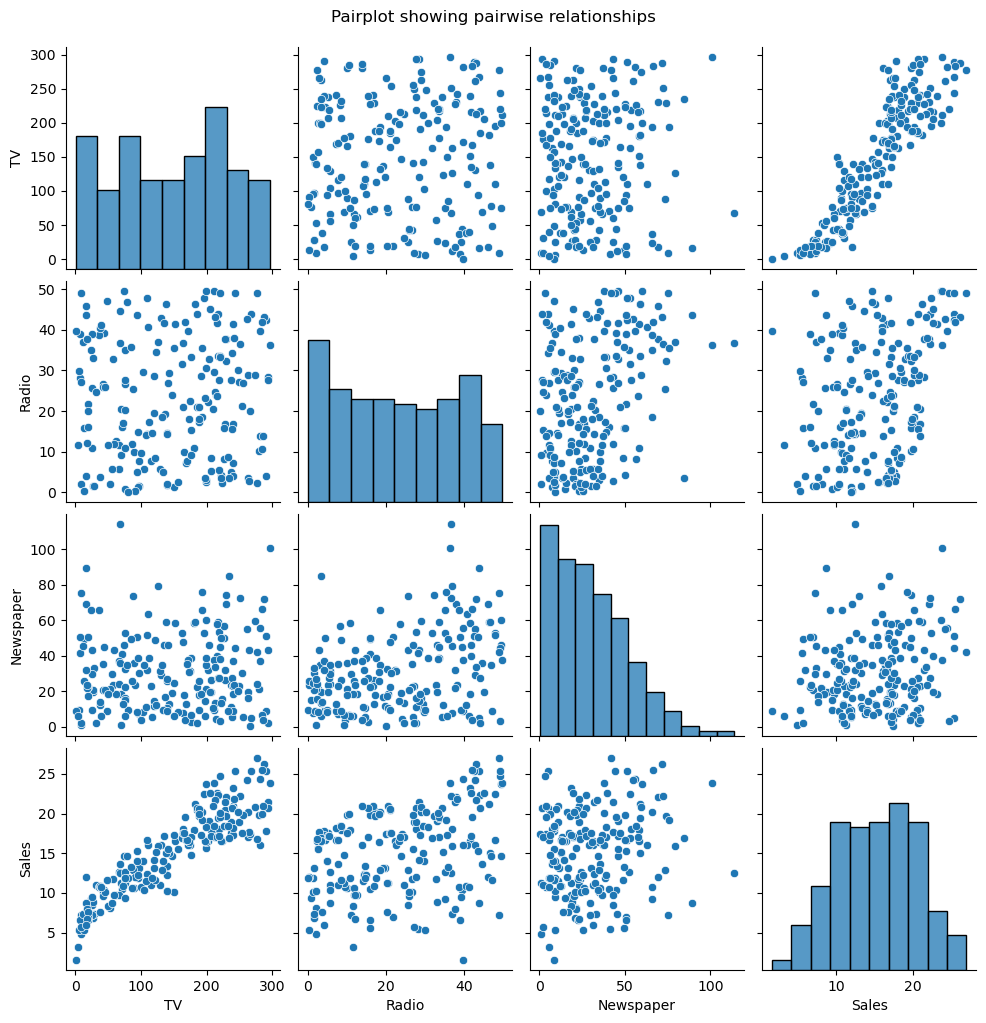

In [19]:
# Bivariate Analysis
"""
In bivariate analysis, we examine relationships between pairs of variables.
This step helps us to understand how Sales depend on each advertising medium (TV, Radio, Newspaper).
"""
# Scatterplots between Sales and each features
features = ['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(15,4))
for idx, feature in enumerate(features):
    plt.subplot(1, 3, idx+1)
    sns.scatterplot(x=df[feature], y=df['Sales'], color='darkorange')
    plt.title(f'Sales vs {feature}')
    plt.xlabel(f'{feature} Spend')
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Pairplot for all variables together
sns.pairplot(df)
plt.suptitle('Pairplot showing pairwise relationships', y=1.02)
plt.show()

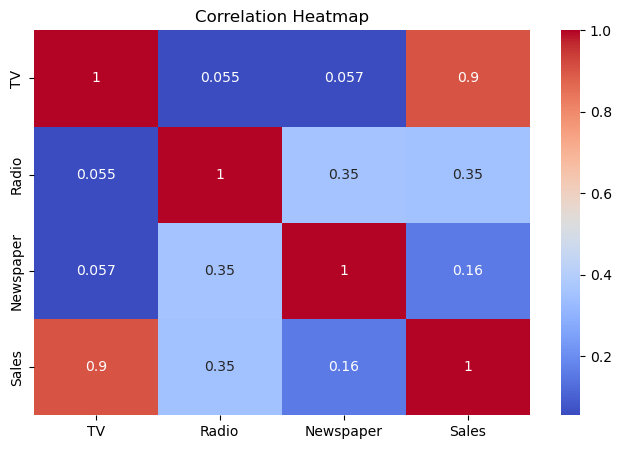

In [21]:
#Step7:- Correlation Heatmap 
plt.figure(figsize= (8,5))
sns.heatmap(df.corr(),annot=True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

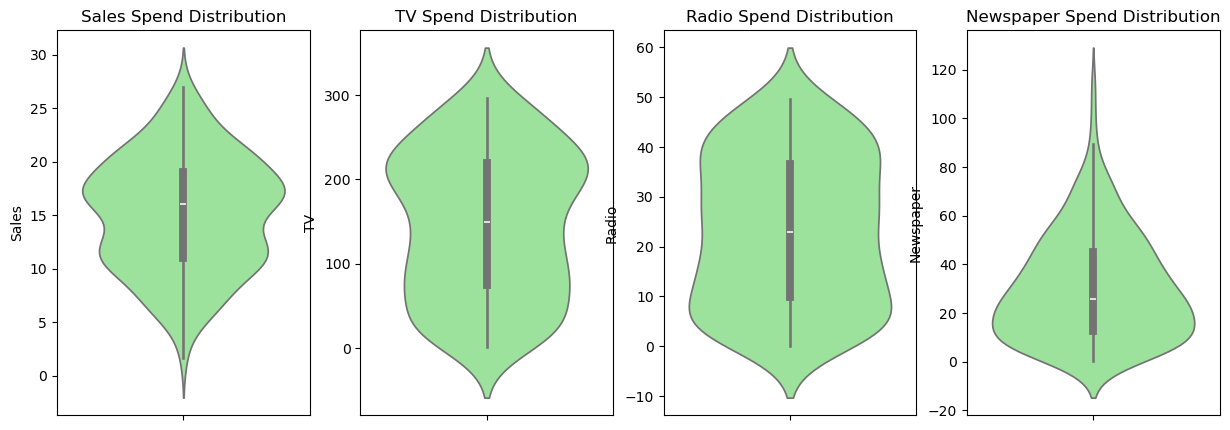

In [24]:
# Step8: Violinplots to Understand Spend Distribution
plt.figure(figsize=(15,5))
for i, feature in enumerate(['Sales','TV', 'Radio',  'Newspaper']):
    plt.subplot(1,4,i+1)
    sns.violinplot(y=df[feature],color= 'lightgreen')
    plt.title(f'{feature} Spend Distribution')
plt.show()

In [25]:
# Step9: Feature Engineering
df['Total_Spend'] = df['Sales'] + df['TV'] + df['Radio'] + df['Newspaper']
print(df.head())

      TV  Radio  Newspaper  Sales  Total_Spend
0  230.1   37.8       69.2   22.1        359.2
1   44.5   39.3       45.1   10.4        139.3
2   17.2   45.9       69.3   12.0        144.4
3  151.5   41.3       58.5   16.5        267.8
4  180.8   10.8       58.4   17.9        267.9


In [26]:
#Step10: Simple Linear Regression(TV only) 
# Define Features and Target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Train- test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)
lr_tv = LinearRegression()
lr_tv.fit(X_train[['TV']],y_train)
y_pred_tv = lr_tv.predict(X_test[['TV']])
print("R2 Score (TV only):", r2_score(y_test, y_pred_tv))

R2 Score (TV only): 0.802561303423698


In [28]:
# Simple Linear Regression(Radio only)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Train- test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)
lr_radio = LinearRegression()
lr_radio.fit(X_train[['Radio']],y_train)
y_pred_radio = lr_radio.predict(X_test[['Radio']])
print("R2 Score (Radio only):", r2_score(y_test, y_pred_radio))

R2 Score (Radio only): 0.10697088619553419


In [29]:
# Simple Linear Regression(Newspaper only)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Train- test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)
lr_newspaper = LinearRegression()
lr_newspaper.fit(X_train[['Newspaper']],y_train)
y_pred_newspaper = lr_newspaper.predict(X_test[['Newspaper']])
print("R2 Score (Newspaper only):", r2_score(y_test, y_pred_newspaper))

R2 Score (Newspaper only): 0.004586344085821592


In [30]:
# Multiple Linear Regression( All Features)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Train- test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Model Performance Metircs Function
def model_metrics(y_true, y_pred):
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("\nLinear Regression Preformance:")
model_metrics(y_test, y_pred_lr)


Linear Regression Preformance:
R2 Score: 0.9059011844150826
MAE: 1.274826210954934
MSE: 2.907756910271091
RMSE: 1.7052146229349228


In [31]:
# Step 11: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state =42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
model_metrics(y_test, y_pred_rf)


Random Forest Performance:
R2 Score: 0.9534827934927883
MAE: 0.9179999999999993
MSE: 1.4374328500000009
RMSE: 1.1989298770153327


In [33]:
# Step 12: XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate =0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Performance:")
model_metrics(y_test, y_pred_xgb)


XGBoost Performance:
R2 Score: 0.9574013125677735
MAE: 0.8750820755958557
MSE: 1.3163463002119749
RMSE: 1.1473213587360669


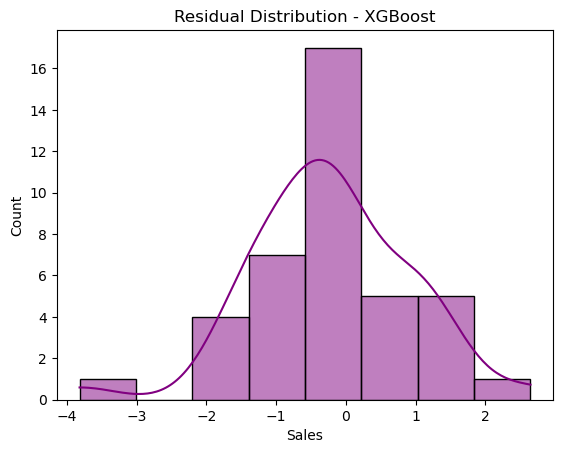

In [35]:
# Step13: Residual Analysis
residuals = y_test -  y_pred_xgb
sns.histplot(residuals, kde = True, color =  'purple')
plt.title('Residual Distribution - XGBoost')
plt.show()

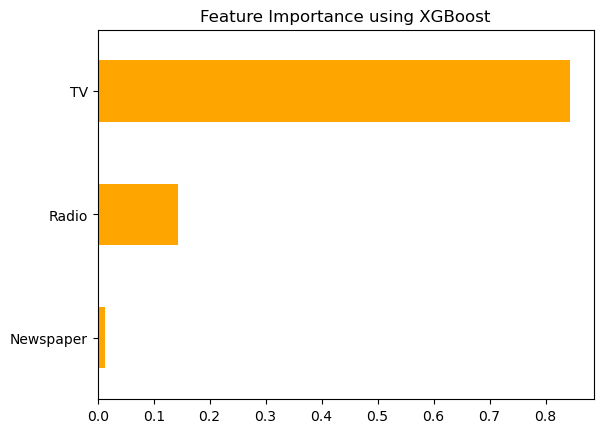

In [36]:
# Step14: Feature Importance Plot
feature_importance = pd.Series(xgb.feature_importances_, index= X.columns)
feature_importance.sort_values().plot(kind= 'barh', color =  'orange')
plt.title('Feature Importance using XGBoost')
plt.show()

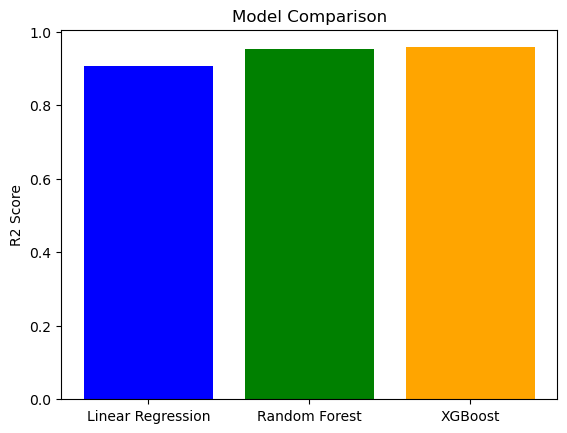

In [37]:
#Step15: Model Comparison Visualization
scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb)]
models = ['Linear Regression', 'Random Forest', 'XGBoost']
plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.ylabel('R2 Score')
plt.title('Model Comparison')
plt.show()

In [39]:
# Example Prediction
example = [[150, 25, 30]]
predicted_sales = xgb.predict(example)[0]
print("Predicted Sales for input[150 TV, 25 Radio, 30 Newspaper]:", round(predicted_sales,2))

Predicted Sales for input[150 TV, 25 Radio, 30 Newspaper]: 14.73


In [ ]:
# Conclusion Summary: Sales Prediction Pro